In [1]:
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image as image
sns.set()

In [2]:
conn=sq.connect('Assignment.db')

In [3]:
c = conn.cursor()

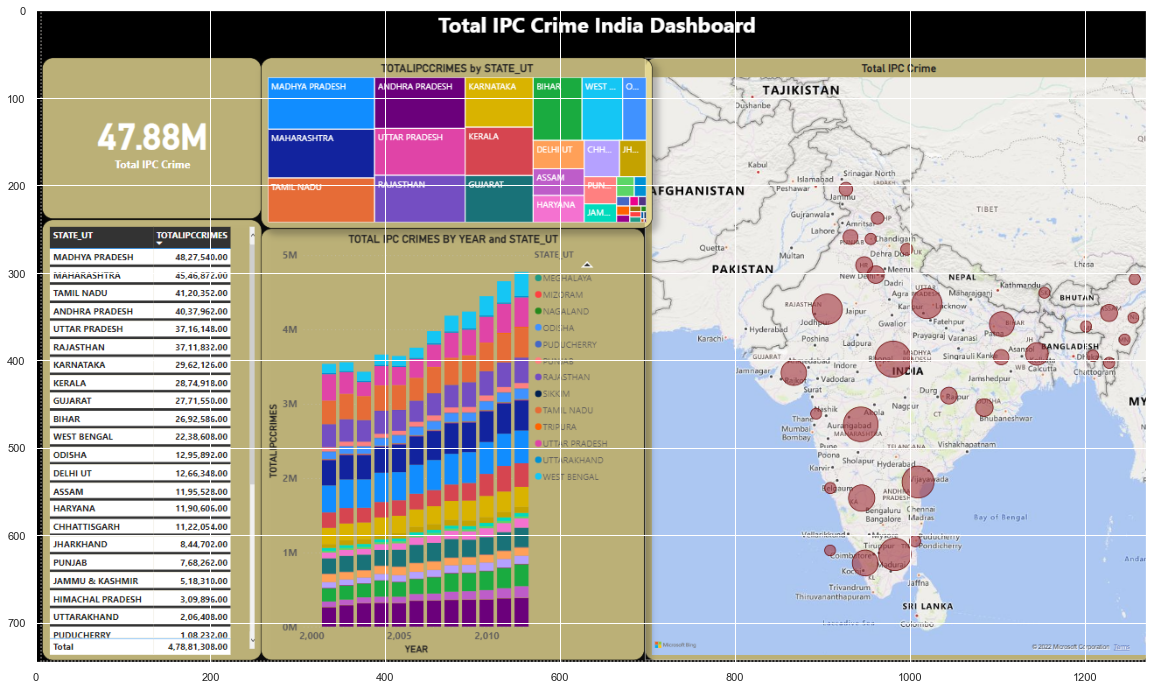

In [4]:
Total_crime = image.open("Total IPC Crime India 2001_2012.png")
plt.figure(figsize=(24,12))
plt.imshow(Total_crime)
plt.show()

## The above dashboard shows the all crimes in India during 2001-2012 according to the  Indian crime dataset
###     --> Total 47.88M IPC cases happened during this interval
###     --> Top states with higher crimes are : Madhya Pradesh,Maharashtra,Tamil Nadu,Andra Pradesh And Uttar Pradesh
###     ---> From the map we can say that larger the state more the crime happend

# Observations as per above analysis :- 

* Total crimes in India according to dataset from 2001 to 2012 is 47.88 Million
* as per above observation the state which is having maximum crime rate is n Madhaya Pradesh followed by Maharashtra 

### Top 5 states :-
*           Madhaya Pradesh
*           Maharashtra
*           Tamil Nadu
*           Andhra Pradesh
*           Uttar Pradesh

## Summary 
The IPC Crime India dataset Published by government on there Official Website https://data.gov.in/ which shows crime in India States and union territories wise and as per our analysis we found out that the most crime occured in state is Madhaya Pradesh followed by Maharashtra as per shown in graphs and map <br><br>
The total of top 5 states crime :- <br>
$\;\;\;\;\;\;$  1. Madhaya Pradesh = 48,27,540 <br>
$\;\;\;\;\;\;$  2. Maharashtra = 45,46,872 <br>
$\;\;\;\;\;\;$  3. Tamil Nadu = 41,20,352 <br>
$\;\;\;\;\;\;$  4. Andhra Pradesh = 40,37,962 <br>
$\;\;\;\;\;\;$  5. Uttar Pradesh =  37,16,148 <br><br>
$\;\;\;\;\;\;$  $\;\;\;\;\;\;\;\;\;\;$TOTAL  =  21,248,874


and this total of 5 states is exactly the 47.37% of total 47.88 Million 


##  Q1.What is the major reason people being kidnapped in each and every state?

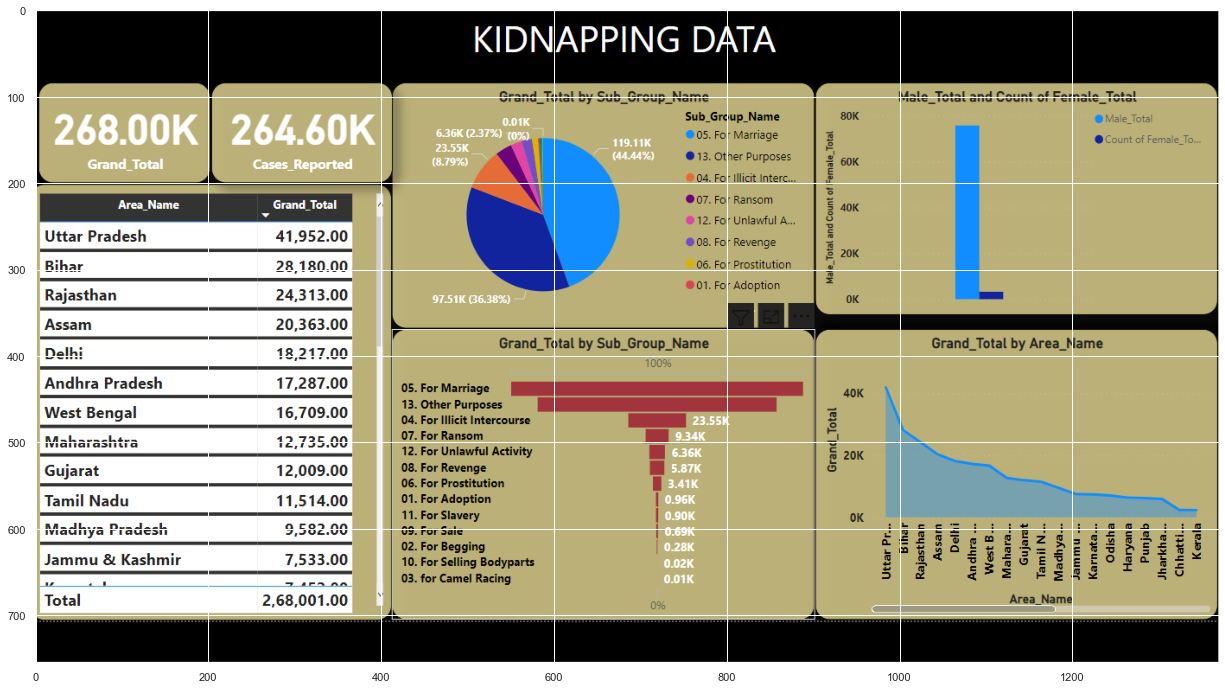

In [5]:
Kidnap_dashboard= image.open("Kidnappingdashboard.png")
plt.figure(figsize=(24,12))
plt.imshow(Kidnap_dashboard)
plt.show()

In [6]:
kidnap = pd.read_sql_query("SELECT * from(select Area_Name,Group_Name,sum(Cases_Reported) as total_case from Specific_purpose_of_kidnapping_and_abduction GROUP by Area_Name, Group_Name order by sum(Cases_Reported) DESC) group by Area_Name order by total_case desc;", conn)

In [7]:
kidnap

Area_Name                   Group_Name  total_case
0               Uttar Pradesh        Kidnap - For Marriage     20414.0
1                       Delhi  Kidnap - For Other Purposes     13931.0
2                   Rajasthan        Kidnap - For Marriage     12710.0
3                       Assam        Kidnap - For Marriage     12555.0
4                       Bihar        Kidnap - For Marriage     11384.0
5              Andhra Pradesh  Kidnap - For Other Purposes      7405.0
6                     Gujarat        Kidnap - For Marriage      7206.0
7                 West Bengal        Kidnap - For Marriage      6733.0
8                  Tamil Nadu        Kidnap - For Marriage      6733.0
9                 Maharashtra        Kidnap - For Marriage      5879.0
10                  Karnataka  Kidnap - For Other Purposes      5261.0
11             Madhya Pradesh        Kidnap - For Marriage      4197.0
12            Jammu & Kashmir        Kidnap - For Marriage      3479.0
13                     Odisha        Kidnap - For Marriage      2963.0
14                     Punjab        Kidnap - For Marriage      2954.0
15                    Haryana        Kidnap - For Marriage      2946.0
16                  Jharkhand        Kidnap - For Marriage      2823.0
17                     Kerala  Kidnap - For Other Purposes      1309.0
18               Chhattisgarh        Kidnap - For Marriage      1288.0
19                Uttarakhand        Kidnap - For Marriage      1276.0
20           Himachal Pradesh        Kidnap - For Marriage      1062.0
21                    Manipur        Kidnap - For Marriage       662.0
22                    Tripura        Kidnap - For Marriage       498.0
23          Arunachal Pradesh        Kidnap - For Marriage       349.0
24                 Chandigarh        Kidnap - For Marriage       334.0
25                   Nagaland  Kidnap - For Other Purposes       225.0
26                  Meghalaya          Kidnap - For Ransom       197.0
27                        Goa  Kidnap - For Other Purposes       116.0
28                 Puducherry        Kidnap - For Marriage        79.0
29       Dadra & Nagar Haveli        Kidnap - For Marriage        65.0
30  Andaman & Nicobar Islands  Kidnap - For Other Purposes        62.0
31                    Mizoram  Kidnap - For Other Purposes        48.0
32                Daman & Diu  Kidnap - For Other Purposes        17.0
33                     Sikkim        Kidnap - For Marriage        16.0
34                Lakshadweep          Kidnap - For Ransom         1.0
35                       None                         None         NaN

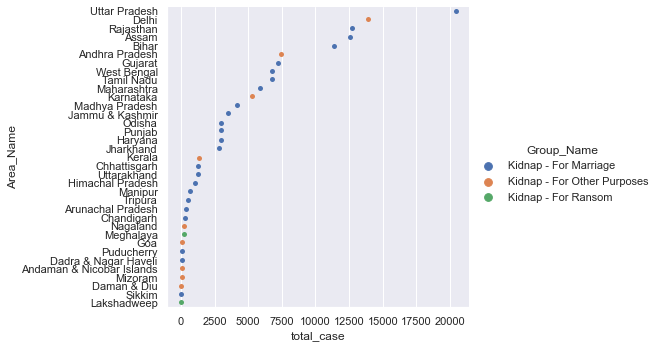

In [8]:
sns.catplot(y="Area_Name",x ="total_case",hue ="Group_Name",data = kidnap,aspect=1.5)
plt.show()

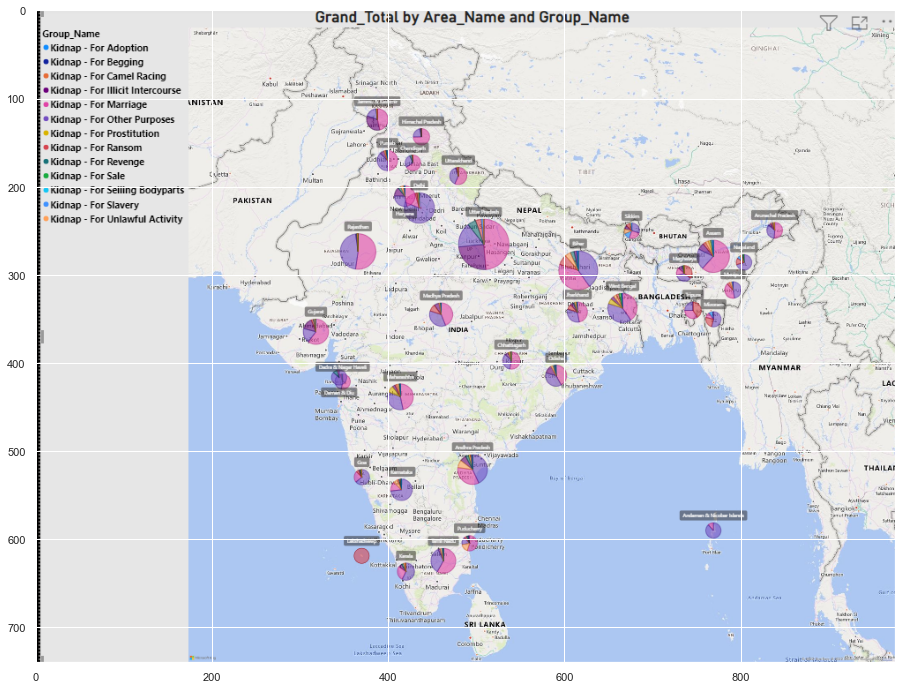

In [9]:
kidnap_map = image.open("Kidnapping.png")
plt.figure(figsize=(24,12))
plt.imshow(kidnap_map )
plt.show()

# Section Observation
## The Total cases of kidnapping during duration 2001-2012 was around 268K out of which 264.46 cases had been reported to police.
### ---> Mostly kidnapping had been done for marriage,other purpose and lllict intercourse.
### ---> The states with most kidnapping and their reason :
####           * Uttar Pradesh  :Marriage
####           * Delhi : Other Purpose
####            * Rajsthan : Marriage
####            * Assam : Marriage
####            * Bihar : Marriage
####  Map Note : Larger the circle in map indicates more crime with colour area specifies the reason of kidnapping.

## summary <br>

The main reason that we find in our analysis is the Marriage people kidnapes the person for forcefull marriage <br>
the second major reason is Other Purpose which is not defined and can be concluded different reasons which is not cleare and there no conclusion can be made as per limited data or no data on other purposes <br>
third reason is  Illicit Intercourse which has more or less the same meaning as rape<br>
fourth reason is Ransom which is self explainatory people being kidnaped for money.<br>
Fifth reason is unlawful activity whic can be included any other reasons that are not mentioned above. 

##   Q2.Offenders relation to the rape victim

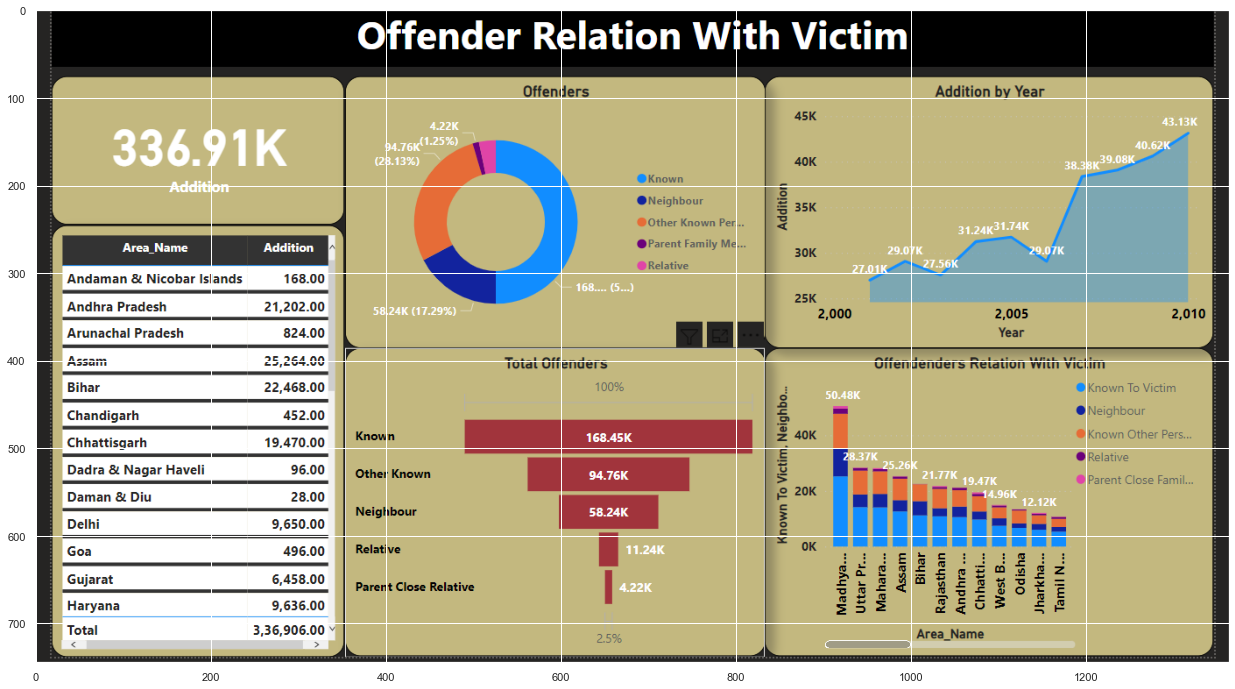

In [10]:
offenderrealtion_dashboard= image.open("offenderrealtion.png")
plt.figure(figsize=(24,12))
plt.imshow(offenderrealtion_dashboard)
plt.show()

In [11]:
offender_relation=pd.read_sql_query("SELECT sum(No_of_Cases_in_which_offenders_were_Neighbours) as Neighbour,sum(No_of_Cases_in_which_offenders_were_Other_Known_persons) as known,\
sum(No_of_Cases_in_which_offenders_were_Parentsclose_family_members) as Parentsclose_family_members ,sum(No_of_Cases_in_which_offenders_were_Relatives) as offenders_were_Relatives,\
sum(No_of_Cases_in_which_offenders_were_known_to_the_Victims) as known_to_the_Victims from Offenders_known_to_the_victim",conn)

In [12]:
offender=offender_relation.transpose().reset_index().rename(columns={"index":"Relation",0: 'Total'})


In [13]:
offender

Relation   Total
0                    Neighbour   58239
1                        known   94755
2  Parentsclose_family_members    4216
3     offenders_were_Relatives   11242
4         known_to_the_Victims  168454

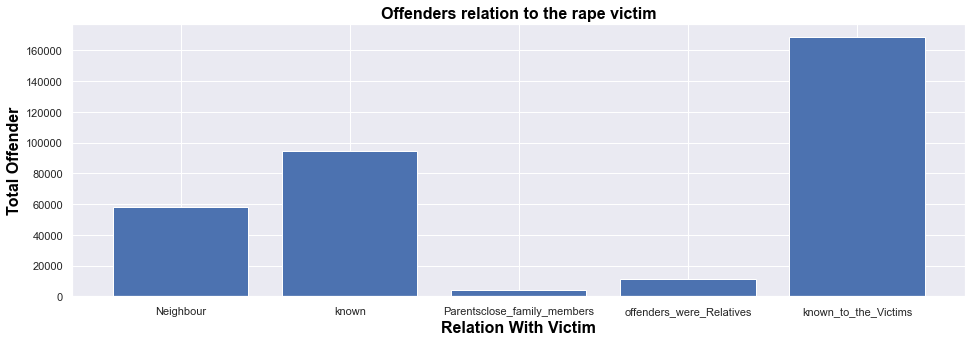

In [14]:
plt.figure(figsize=(16,5))
plt.bar(offender["Relation"],offender["Total"])
font={'color':'Black','weight':'bold','size': 16}
plt.xlabel("Relation With Victim",fontdict=font)
plt.ylabel("Total Offender",fontdict=font)
plt.title("Offenders relation to the rape victim",fontdict=font)
plt.show()

# Section Observation
##  Duration 2001-2012 was around 366.91K cases were registered for rape in India:
### ---> Most of the cases were registered from Madhaya Pradesh,Uttarpradesh,Maharashtra,Assam Bihar etc.
### ---> Most of the offenders were known(46%),other known (26%),neighbour(14%) and close relative(11.4%).


## Summary <br>
our analysis clearly shows that the offenders of rape victims are known to the victims and known to there family but not close to them as parents close family members are having lowest possiblities

## Q3.Juveniles family background, education and economic setup.

In [15]:
Juvinials_data = pd.read_sql_query("SELECT  d.Area_Name , e.income_upto_25k , e.income_25k_50k , e.income_50k_1L ,e.income_1L_2L , e.income_2L_3l , e.income_above_3L , f.homless , f.living_wd_guardians , f.living_wd_parents , d.illetrate , d.upto_Primary , d.below_higerSecondary , d.higher_secondary_above FROM   (SELECT sum(Family_back_ground_Homeless) as homless,      \
  sum(Family_back_ground_Living_with_guardian) as living_wd_guardians,      \
  sum(Family_back_ground_Living_with_parents) as living_wd_parents ,      \
  Area_Name\
  FROM EBJuveniles_arrested_Family_background       \
  GROUP BY Area_Name ) as f   \
  join \
  (SELECT    \
  sum(Economic_Set_up_Annual_Income_250001_to_50000) as income_25k_50k,      \
  sum(Economic_Set_up_Annual_Income_upto_Rs_25000) as income_upto_25k,      \
  sum(Economic_Set_up_Middle_income_from_100001_to_200000) as income_1L_2L,      \
  sum(Economic_Set_up_Middle_income_from_50001_to_100000) as income_50k_1L ,      \
  sum(Economic_Set_up_Upper_income_above_Rs_300000)as income_above_3L,      \
  sum(Economic_Set_up_Upper_middle_income_from_200001_to_300000)as income_2L_3l,      \
  Area_Name       \
  FROM ESJuveniles_arrested_Economic_setup       \
  GROUP BY Area_Name      \
  ) as e      \
  ON      \
  f.Area_Name = e.Area_Name       \
  JOIN      \
  (SELECT sum(Education_Illiterate) as illetrate ,      \
  sum(Education_Upto_primary) as upto_Primary,      \
  sum(Education_Above_Primary_but_below_Matric_or_Higher_Secondary) as below_higerSecondary,      \
  sum('Education_Matric_or_Higher_Secondary_&_above') as higher_secondary_above,      \
  Area_Name      \
  FROM EJuveniles_arrested_Education      \
  GROUP BY Area_Name      \
  ) as d      \
  ON      \
  e.Area_Name = d.Area_Name",conn)

In [16]:
Juvinials_data

Area_Name  income_upto_25k  income_25k_50k  income_50k_1L  \
0   Andaman & Nicobar Islands               74             200             53   
1              Andhra Pradesh            14487            3870           1311   
2           Arunachal Pradesh              390             543            230   
3                       Assam             3256            1101            343   
4                       Bihar             3669            2214            767   
5                  Chandigarh              503             348            263   
6                Chhattisgarh            14576            4506           2014   
7        Dadra & Nagar Haveli               65              37             10   
8                 Daman & Diu               20              15             10   
9                       Delhi             6664            1903            548   
10                        Goa              528             141             62   
11                    Gujarat            23314            3902           1304   
12                    Haryana             8729            5748           2236   
13           Himachal Pradesh              787             522            172   
14            Jammu & Kashmir               53              38             14   
15                  Jharkhand             3583            1829            675   
16                  Karnataka             3379             635            305   
17                     Kerala             2885            1726            628   
18                Lakshadweep                2               0              0   
19             Madhya Pradesh            45263           14979           8604   
20                Maharashtra            46263            9833           3312   
21                    Manipur                0               0              0   
22                  Meghalaya              607             163             54   
23                    Mizoram             1192             415            104   
24                   Nagaland               94              11             14   
25                     Odisha             3942             693            163   
26                 Puducherry              268             152             20   
27                     Punjab              746             529            114   
28                  Rajasthan            14423            4889           2213   
29                     Sikkim              344              28              9   
30                 Tamil Nadu            26763            2668            406   
31                    Tripura              117              55             34   
32              Uttar Pradesh             1204             957            528   
33                Uttarakhand              494             304            139   
34                West Bengal             1144             556            175   

    income_1L_2L  income_2L_3l  income_above_3L  homless  living_wd_guardians  \
0             12             0                0        0                   37   
1            213            17               16     5234                 3061   
2             30             0                0        1                  505   
3            162            60               31      647                 1624   
4            204            12                5      553                 1256   
5             57             6                0       35                   55   
6            653           278               77      765                 3125   
7              2             0                0        0                    0   
8              2             1                0        4                   11   
9             85            17               13      746                 1748   
10            14             5                3       21                   34   
11           170            82               58     2586                 2456   
12           590           155               26   

In [17]:
juvinials_tr=Juvinials_data.drop("Area_Name",1)
juvinials_tr

C:\Users\Nishant\AppData\Local\Temp/ipykernel_11184/3890873488.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  juvinials_tr=Juvinials_data.drop("Area_Name",1)


income_upto_25k  income_25k_50k  income_50k_1L  income_1L_2L  \
0                74             200             53            12   
1             14487            3870           1311           213   
2               390             543            230            30   
3              3256            1101            343           162   
4              3669            2214            767           204   
5               503             348            263            57   
6             14576            4506           2014           653   
7                65              37             10             2   
8                20              15             10             2   
9              6664            1903            548            85   
10              528             141             62            14   
11            23314            3902           1304           170   
12             8729            5748           2236           590   
13              787             522            172            26   
14               53              38             14             5   
15             3583            1829            675           431   
16             3379             635            305            84   
17             2885            1726            628           146   
18                2               0              0             0   
19            45263           14979           8604          2084   
20            46263            9833           3312          1235   
21                0               0              0             0   
22              607             163             54            15   
23             1192             415            104            70   
24               94              11             14             3   
25             3942             693            163            13   
26              268             152             20             0   
27              746             529            114            27   
28            14423            4889           2213           573   
29              344              28              9             0   
30            26763            2668            406            37   
31              117              55             34             3   
32             1204             957            528           210   
33              494             304            139            41   
34             1144             556            175            21   

    income_2L_3l  income_above_3L  homless  living_wd_guardians  \
0              0                0        0                   37   
1             17               16     5234                 3061   
2              0                0        1                  505   
3             60               31      647                 1624   
4             12                5      553                 1256   
5              6                0       35                   55   
6            278               77      765                 3125   
7              0                0        0                    0   
8              1                0        4                   11   
9             17               13      746                 1748   
10             5                3       21                   34   
11            82               58     2586                 2456   
12           155               26      951                  985   
13             3               12        0                   93   
14             2                2        1                    1   
15            21               20      702                 2352   
16            28                6      237                  599   
17            19                0      176                  478   
18             0                0        0                    0   
19           229               95     2754                13035   
20           408               60     2681                 7623   
21             0                0        0                    0   
22            

In [18]:
y=juvinials_tr.corr()

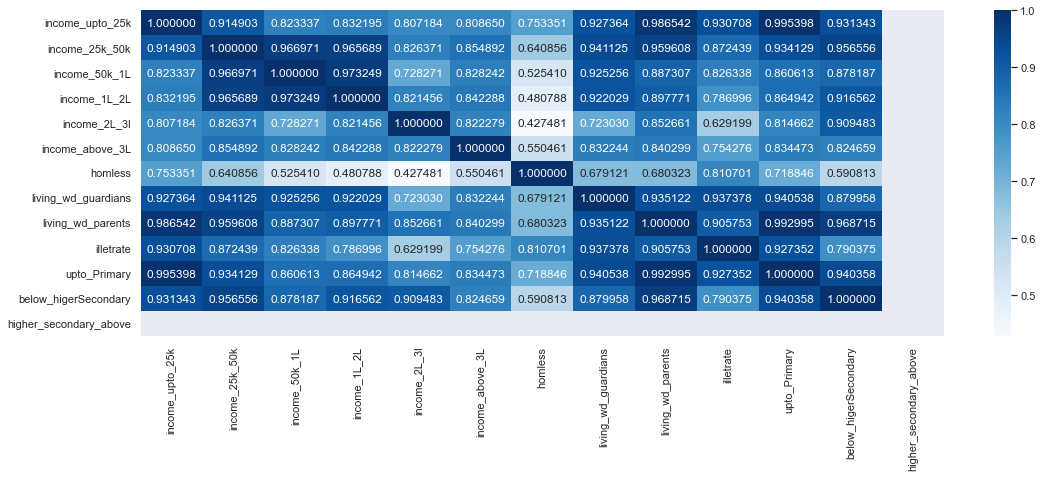

In [19]:
plt.figure(figsize=(18,6))
sns.heatmap(y,fmt="f", annot=True, cmap='Blues')
plt.show()

# Section Observation
## The heatmap above describes the realtion of all the Juveniles family background, education and economic setup realtionship :
### ---> The crime have done crime whose income is less than 25K and they have studied up to primary school and also living with parents, they are highly corelated too correalation value 0.99.


## Summary <br>
our analysis clearly shows that the Juvinials were having low income which is quite satasified that due to low or no income juvinials commiting crimes and supprisingly living with guardians have more significance on data then homeless and as per education background illetrate or upto primary shows more heat as shown in heat map where education above higher secondary have nothing relations this is may be due to higher secondary above will mostly beeing 18 or above which is can not be included  juvinial. 

## Q4.Which state has more crime against children and women?

###  Top 5 States with Higher Crime Aganist  Women & Children Combined

In [20]:
state_crime_children_women=pd.read_sql_query("SELECT c.STATE_UT,(w.total_crime_on_women+c.total_crime_on_children) as Total_Crime from(SELECT STATE_UT,(sum(rape)+sum(KidnappingandAbduction)+sum(DowryDeaths)+sum(Assaultonwomenwithintenttooutragehermodesty)+sum(InsulttomodestyofWomen)+sum(CrueltybyHusbandorhisRelatives)+sum(ImportationofGirls)) as total_crime_on_women from District_wise_crimes_committed_against_women_2001_2012 GROUP by STATE_UT order by total_crime_on_women DESC) as W join (SELECT STATE_UT,sum(total) as total_crime_on_children from District_wise_crimes_committed_against_children_2001_2012 GROUP by STATE_UT order by sum(total) desc)as C on c.STATE_UT=W.STATE_UT ORDER by (w.total_crime_on_women+c.total_crime_on_children) DESC limit 5;",conn)

In [21]:
state_crime_children_women


STATE_UT  Total_Crime
0   UTTAR PRADESH       296305
1  ANDHRA PRADESH       274942
2  MADHYA PRADESH       274360
3     MAHARASHTRA       227384
4     WEST BENGAL       216455

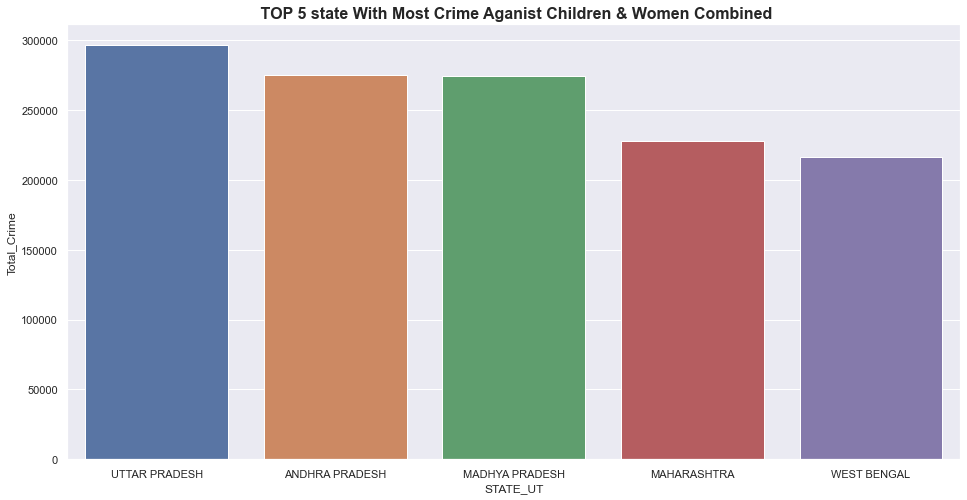

In [22]:
plt.figure(figsize=(16,8))
font={'weight':'bold','size': 16}
plt.title(" TOP 5 state With Most Crime Aganist Children & Women Combined",fontdict=font)
sns.barplot(y=state_crime_children_women["Total_Crime"],x=state_crime_children_women["STATE_UT"])
plt.show()

### Top 5 States With Higher Crime Aganist  Children

In [23]:
state_crime_children = pd.read_sql_query("SELECT STATE_UT,sum(total) as Total_Crime_On_Children from District_wise_crimes_committed_against_children_2001_2012 GROUP by STATE_UT order by sum(total) desc limit 5;",conn)


In [24]:
state_crime_children


STATE_UT  Total_Crime_On_Children
0  MADHYA PRADESH                    90770
1   UTTAR PRADESH                    72004
2     MAHARASHTRA                    62602
3           DELHI                    50049
4  ANDHRA PRADESH                    33158

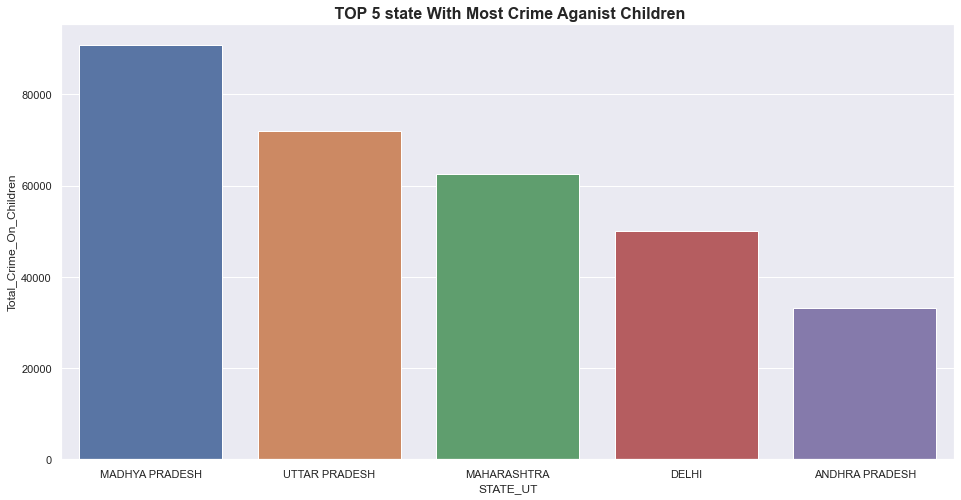

In [25]:
plt.figure(figsize=(16,8))
font={'weight':'bold','size': 16}
plt.title(" TOP 5 state With Most Crime Aganist Children",fontdict=font)
sns.barplot(y=state_crime_children["Total_Crime_On_Children"],x=state_crime_children["STATE_UT"])
plt.show()

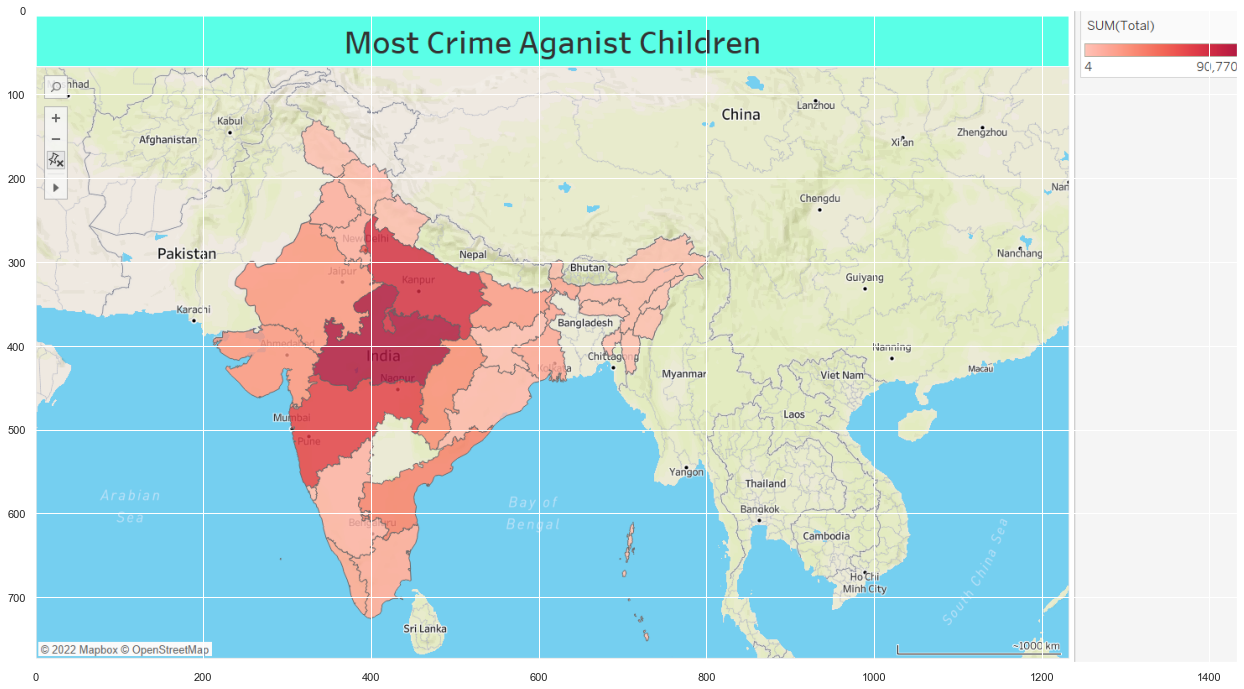

In [26]:
Children_map = image.open("Most Crime Aganist Children.png")
plt.figure(figsize=(24,12))
plt.imshow(Children_map)
plt.show()

#### Note : Darker the area indicates more crime  aganist children state wise.

###  Top 5 States With Higher Crime Aganist Women

In [27]:
state_crime_women = pd.read_sql_query("SELECT STATE_UT, (sum(rape)+sum(KidnappingandAbduction)+sum(DowryDeaths)+sum(Assaultonwomenwithintenttooutragehermodesty)+sum(InsulttomodestyofWomen)+sum(CrueltybyHusbandorhisRelatives)+sum(ImportationofGirls)) as Total_Crime_On_Women from District_wise_crimes_committed_against_women_2001_2012 GROUP by STATE_UT order by total_crime_on_women DESC limit 5;",conn)


In [28]:
state_crime_women

STATE_UT  Total_Crime_On_Women
0  ANDHRA PRADESH                241784
1   UTTAR PRADESH                224301
2     WEST BENGAL                202939
3  MADHYA PRADESH                183590
4       RAJASTHAN                176849

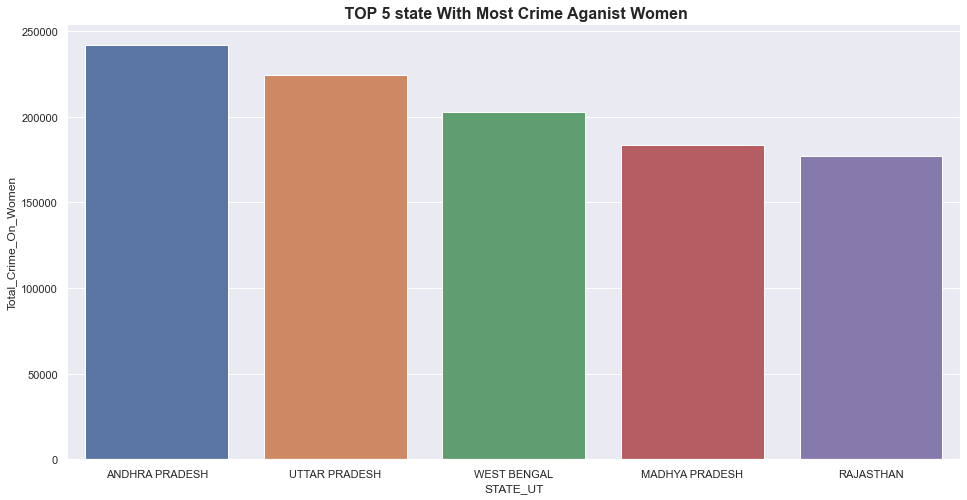

In [29]:
plt.figure(figsize=(16,8))
font={'weight':'bold','size': 16}
plt.title(" TOP 5 state With Most Crime Aganist Women",fontdict=font)
sns.barplot(y=state_crime_women["Total_Crime_On_Women"],x=state_crime_women["STATE_UT"])
plt.show()

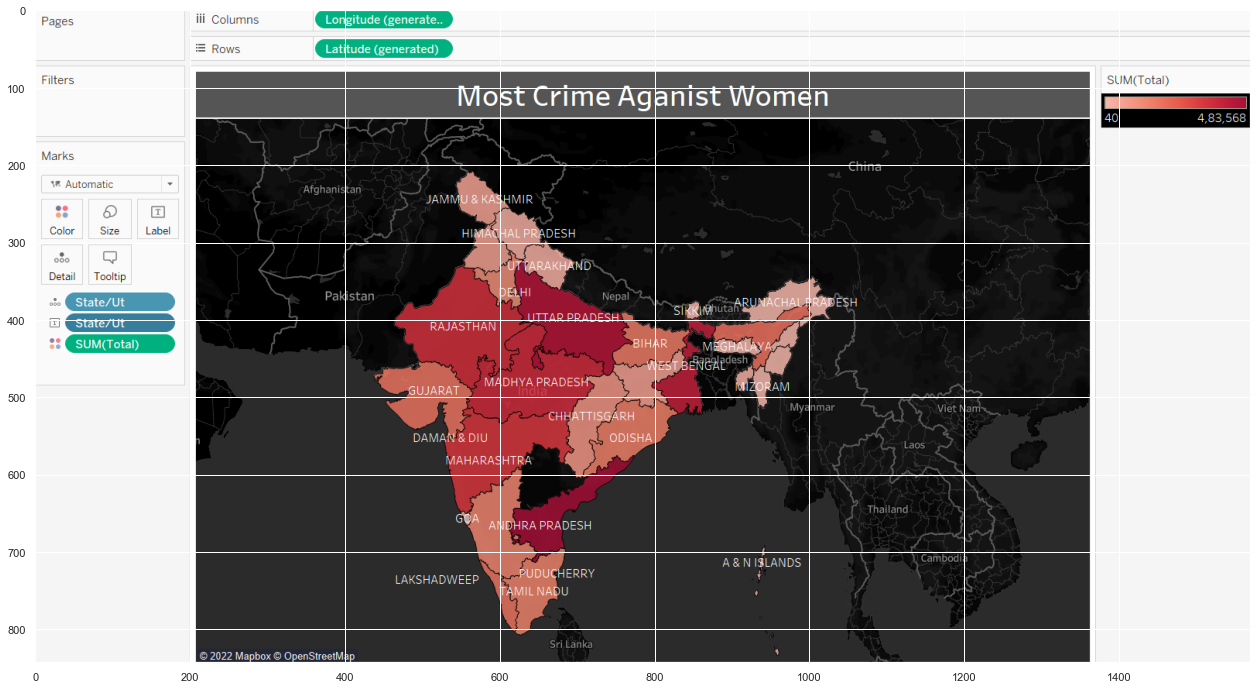

In [30]:
women_map = image.open("crimeaganistwomen.png")
plt.figure(figsize=(24,12))
plt.imshow(women_map)
plt.show()

#### Note : Darker the area indicates more crime  aganist women state wise.

# Section Observation
## 1.) Combined Crime Women And Children :
###    States are : Uttarpradesh,Andhrapradesh,Madhyapradesh,Maharashtra And West Bengal.
## 2.) High Crime Aganist Children :
###    States are : Madhyapradesh,Uttarpradesh,Maharashtra , Delhi And Andhrapradesh .
## 3.) High Crime Aganist Women :
###    States are : Andhrapradesh,Uttarpradesh,West Bengal ,Madhyapradesh,Rajasthan .

## Summary <br>
The crime against women happens most in Andhra Pradesh and against childern It happens in Madhya Pradesh where as Uttar pradesh holds its position on 2nd in both scenerios above we have ploted map which shows both crimes against women and childern <br>

the states where both women and childerns are not safe are Andhra Pradesh , Uttar Pradesh,Madhya Pradesh. these states occures in both tables that clearly implies that it is not safer for Womens as well as childerns as these are infamously leading states in crimes in both scenerios

## Q5. Age group wise murder victim

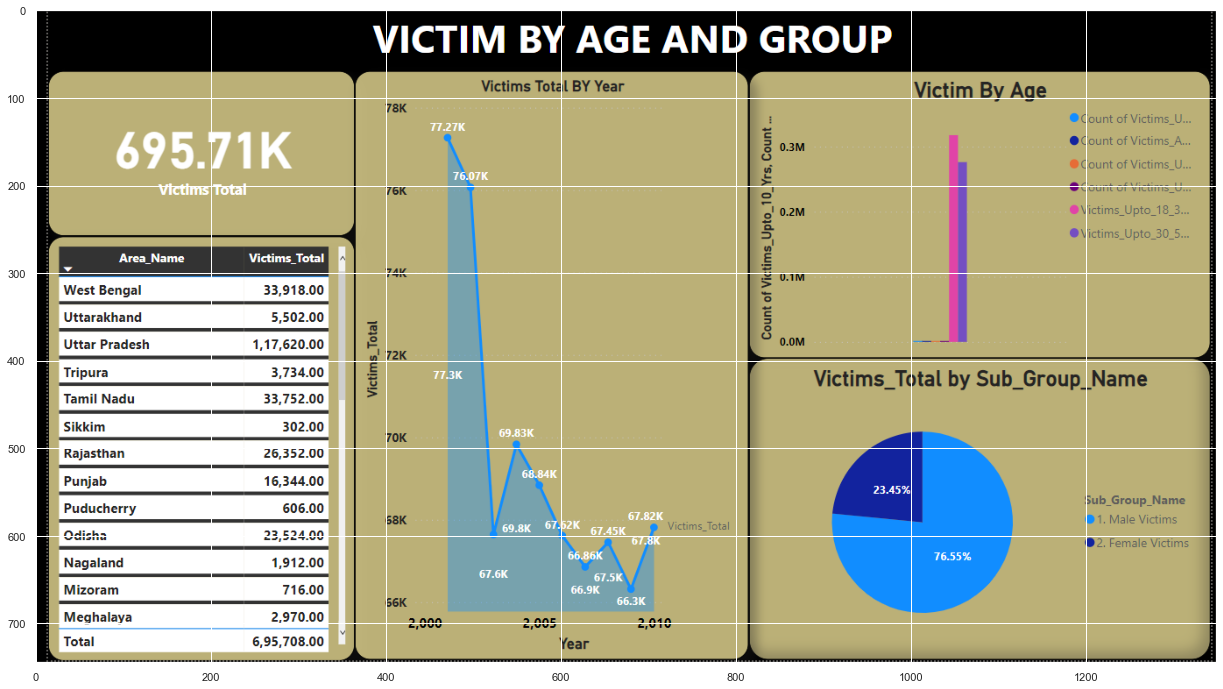

In [31]:
victim_dashboard = image.open("Victimbyagegroup.png")
plt.figure(figsize=(24,12))
plt.imshow(victim_dashboard)
plt.show()

In [32]:
age_group_Victim=pd.read_sql_query("select sum(Victims_Above_50_Yrs)as total_Above_50Yrs,sum(Victims_Upto_10_15_Yrs) as total_Victims_between_10to15Yrs,sum(Victims_Upto_10_Yrs) as total_Victims_Upto_10_Yrs,sum(Victims_Upto_15_18_Yrs) as total_Victims_Upto_15_18_Yrs,sum(Victims_Upto_18_30_Yrs) as total_Victims_Upto_18_30_Yrs,sum(Victims_Upto_30_50_Yrs) as total_Victims_Upto_30_50_Yrs from Murder_victim_age_sex ;",conn)

In [33]:
total_ageby=age_group_Victim.transpose().reset_index().rename(columns={"index":"Age Group",0: 'Total'})

In [34]:
total_ageby

Age Group     Total
0                total_Above_50Yrs   64992.0
1  total_Victims_between_10to15Yrs    8354.0
2        total_Victims_Upto_10_Yrs   13254.0
3     total_Victims_Upto_15_18_Yrs   15386.0
4     total_Victims_Upto_18_30_Yrs  317572.0
5     total_Victims_Upto_30_50_Yrs  276150.0

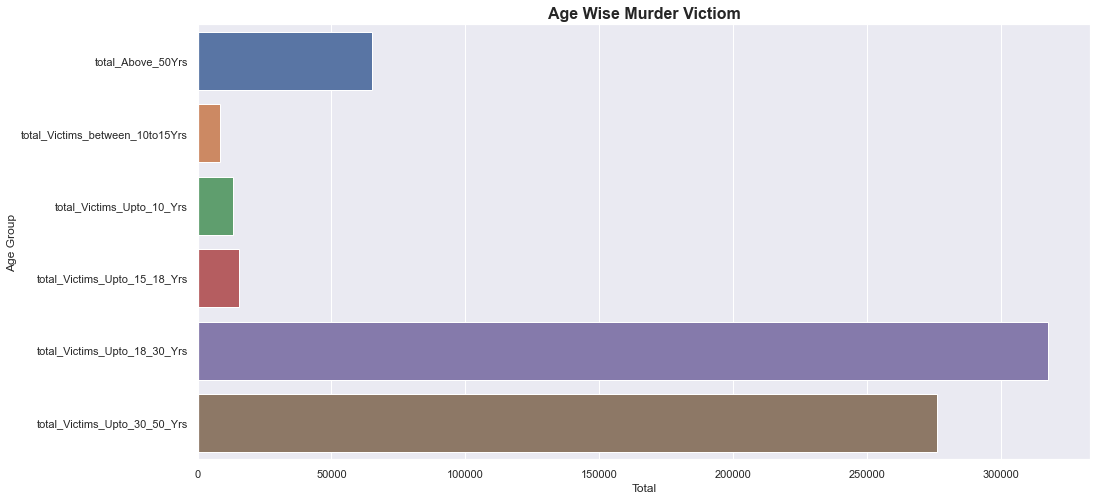

In [35]:
plt.figure(figsize=(16,8))
font={'weight':'bold','size': 16}
plt.title("Age Wise Murder Victiom",fontdict=font)
sns.barplot(y=total_ageby["Age Group"],x=total_ageby["Total"])
plt.show()

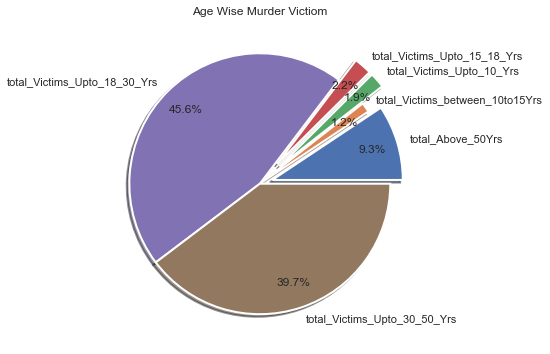

In [36]:
plt.figure(figsize=(16,6))
font={'weight':'bold','size': 16}
plt.title("Age Wise Murder Victiom")
explode = (0.1,0,0.2,0.2,0,0)
my_labels = total_ageby["Age Group"]
plt.pie(total_ageby["Total"],labels=my_labels, explode=explode,pctdistance=0.8,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
plt.show()

# Section Overveiw
### ---> The most victim are  of younger  age people whose age ranges from 18 to 30 year.
### ---> The second most age group ranges from 30 to 50.
### ---> While other age group has significantly low crime rate.

# Summary
There is clearly shown that murdered victims were mostly 18 to 30 years old <br>
the most victims are Male <br>

the age group disturbution is 18 to 30 years = 45.6% and 30 to 50 years = 39.7% which is 80% aprox of total murder victims 
and Male victims are 76.5% 

## Q6. Crime by place of occurrence.

In [37]:
crime_by_place_of_occurence=pd.read_sql_query("SELECT sum(RESIDENTIALPREMISES_Dacoity) as Total_RESIDENTIALPREMISES_Dacoity,sum(RESIDENTIALPREMISES_Robbery) as Total_RESIDENTIALPREMISES_Robbery,sum(RESIDENTIALPREMISES_Theft)as Total_RESIDENTIALPREMISES_Theft,sum(RESIDENTIALPREMISES_Burglary) as Total_RESIDENTIALPREMISES_Burglary,sum(HIGHWAYS_Burglary) as Total_HIGHWAYS_Burglary,sum(HIGHWAYS_Dacoity)as Total_HIGHWAYS_Dacoity,sum(HIGHWAYS_Robbery) as Total_HIGHWAYS_Robbery,sum(HIGHWAYS_Theft)as Total_HIGHWAYS_Theft,sum(RIVERandSEA_Theft) as Total_RIVERandSEA_Theft,sum(RIVERandSEA_Burglary) as Total_RIVERandSEA_Burglary,sum(RIVERandSEA_Dacoity) as Total_RIVERandSEA_Dacoity,sum(RIVERandSEA_Robbery) as Total_RIVERandSEA_Robbery,sum(RAILWAYS_Burglary) as Total_RAILWAYS_Burglary,sum(RAILWAYS_Dacoity) as Total_RAILWAYS_Dacoity,sum(RAILWAYS_Robbery) as Total_RAILWAYS_Robbery,sum(RAILWAYS_Theft) as Total_RAILWAYS_Theft,sum(BANKS_Burglary)as Total_BANKS_Burglary ,sum(BANKS_Dacoity) as Total_BANKS_Dacoity,sum(BANKS_Robbery) as Total_BANKS_Robbery,sum(BANKS_Theft) as Total_BANKS_Theft,sum(COMMERCIALESTABLISHMENTS_Burglary) as Total_COMMERCIALESTABLISHMENTS_Burglary,sum(COMMERCIALESTABLISHMENTS_Dacoity) as Total_COMMERCIALESTABLISHMENTS_Dacoity,sum(COMMERCIALESTABLISHMENTS_Robbery) as Total_COMMERCIALESTABLISHMENTS_Robbery,sum(COMMERCIALESTABLISHMENTS_Theft)as Total_COMMERCIALESTABLISHMENTS_Theft,sum(OTHERPLACES_Burglary)as Total_OTHERPLACES_Burglary,sum(OTHERPLACES_Dacoity) as Total_OTHERPLACES_Dacoity,sum(OTHERPLACES_Robbery) as Total_OTHERPLACES_Robbery,sum(OTHERPLACES_Theft) as Total_OTHERPLACES_Theft from Crime_by_place_of_occurrence_2001_2012 ;",conn)

In [38]:
occurance=crime_by_place_of_occurence.transpose().reset_index().rename(columns={"index":"Crime Location",0: 'Total'})


In [39]:
occurance

Crime Location    Total
0         Total_RESIDENTIALPREMISES_Dacoity    69427
1         Total_RESIDENTIALPREMISES_Robbery   111504
2           Total_RESIDENTIALPREMISES_Theft  2681928
3        Total_RESIDENTIALPREMISES_Burglary  2140621
4                   Total_HIGHWAYS_Burglary    10200
5                    Total_HIGHWAYS_Dacoity    29733
6                    Total_HIGHWAYS_Robbery   151803
7                      Total_HIGHWAYS_Theft   456314
8                   Total_RIVERandSEA_Theft     6810
9                Total_RIVERandSEA_Burglary      512
10                Total_RIVERandSEA_Dacoity      206
11                Total_RIVERandSEA_Robbery      542
12                  Total_RAILWAYS_Burglary     3998
13                   Total_RAILWAYS_Dacoity     4274
14                   Total_RAILWAYS_Robbery    16798
15                     Total_RAILWAYS_Theft   500349
16                     Total_BANKS_Burglary    13556
17                      Total_BANKS_Dacoity     1973
18                      Total_BANKS_Robbery     3602
19                        Total_BANKS_Theft    14868
20  Total_COMMERCIALESTABLISHMENTS_Burglary   488009
21   Total_COMMERCIALESTABLISHMENTS_Dacoity    11152
22   Total_COMMERCIALESTABLISHMENTS_Robbery    36368
23     Total_COMMERCIALESTABLISHMENTS_Theft   953492
24               Total_OTHERPLACES_Burglary   603236
25                Total_OTHERPLACES_Dacoity    56889
26                Total_OTHERPLACES_Robbery   404084
27                  Total_OTHERPLACES_Theft  5592041

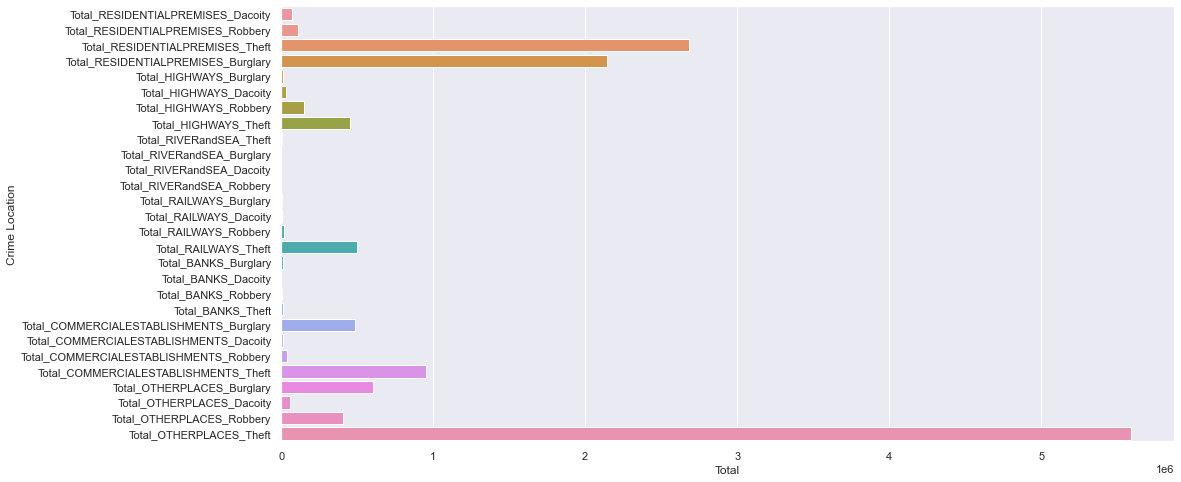

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(x=occurance["Total"],y=occurance["Crime Location"])
plt.show()

# Section Overveiw
### ---> Residental area have more crime as compared to any other place of occurance.
####      * Theft and Bulgarity is quite high in residental area.
### --->  Theft is the major crime in Railways,Highways and Other Places Crime.
### ---> The third major crime in locations are bulgarity which is high in residental area,commerical establishment and other places.
### ---> While other crime is significantly low 

## Q7. Anti corruption cases vs arrests.

In [41]:
Anti_corruption_cases_vs_arrests = pd.read_sql_query("SELECT a.Area_Name, a.ACA01_No_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_beginning_of_the_year as Toatl_Jail, c.AC02_No_of_cases_registered_during_the_year as Total_Case FROM Anti_corruption_arrests a join Anti_corruprion_cases c USING(Area_Name) group by a.Area_Name",conn)


In [42]:
Anti_corruption_cases_vs_arrests


Area_Name  Toatl_Jail  Total_Case
0   Andaman & Nicobar Islands         7.0         0.0
1              Andhra Pradesh       209.0       195.0
2           Arunachal Pradesh         0.0         0.0
3                       Assam        51.0         0.0
4                       Bihar        13.0        12.0
5                  Chandigarh         9.0         3.0
6                Chhattisgarh        74.0        15.0
7        Dadra & Nagar Haveli         0.0         0.0
8                 Daman & Diu         8.0         0.0
9                       Delhi       162.0        39.0
10                        Goa         8.0         0.0
11                    Gujarat       144.0       165.0
12                    Haryana      1014.0        79.0
13           Himachal Pradesh       206.0        20.0
14            Jammu & Kashmir       204.0        27.0
15                  Jharkhand        26.0        15.0
16                  Karnataka       636.0        77.0
17                     Kerala       185.0       122.0
18                Lakshadweep         0.0         0.0
19             Madhya Pradesh       476.0        29.0
20                Maharashtra       775.0       390.0
21                    Manipur         0.0         0.0
22                  Meghalaya         0.0         0.0
23                    Mizoram        14.0         0.0
24                   Nagaland        17.0         0.0
25                     Odisha       305.0       272.0
26                 Puducherry        10.0         1.0
27                     Punjab       338.0       107.0
28                  Rajasthan       436.0       294.0
29                     Sikkim        45.0         7.0
30                 Tamil Nadu        68.0        43.0
31                    Tripura         0.0         0.0
32              Uttar Pradesh       152.0        26.0
33                Uttarakhand         7.0         0.0
34                West Bengal        33.0         0.0

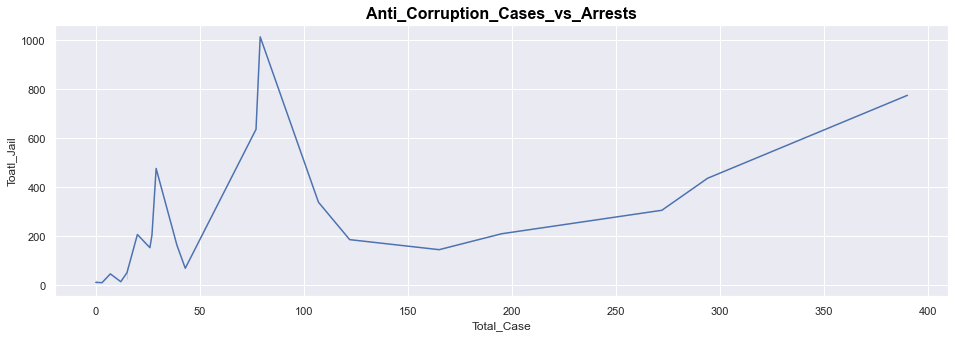

In [43]:
plt.figure(figsize=(16,5))
font={'color':'Black','weight':'bold','size': 16}
plt.title("Anti_Corruption_Cases_vs_Arrests",fontdict=font)
sns.lineplot(x=Anti_corruption_cases_vs_arrests["Total_Case"],y=Anti_corruption_cases_vs_arrests["Toatl_Jail"])
plt.show()

# Section Overveiw
## ---> More than 1 people has been jailed for the cases.
###  * Haryana has 1014 jail aganist the 64 total cases through out the data.
###  * While some state has only jails without cases : West Bangal,Uttrakhand,Daman & Diu etc.

## Q8. Which state has more number of complaints against police?

In [44]:
cases_agnist_police=pd.read_sql_query("select Area_Name,sum(Cases_Registered) as Total from Complaints_against_police GROUP by Area_Name order by sum(Cases_Registered) DESC LIMIT 5;",conn)

In [45]:
cases_agnist_police


Area_Name  Total
0   Uttar Pradesh  28622
1  Andhra Pradesh  16327
2       Jharkhand  11294
3  Madhya Pradesh  10747
4     Maharashtra   4001

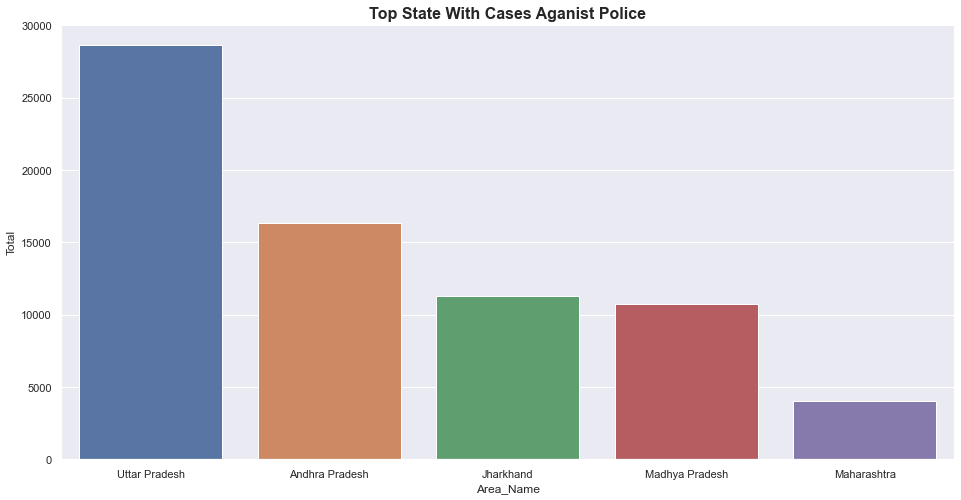

In [46]:
plt.figure(figsize=(16,8))
font={'weight':'bold','size': 16}
plt.title("Top State With Cases Aganist Police",fontdict=font)
sns.barplot(x=cases_agnist_police["Area_Name"],y=cases_agnist_police["Total"])
plt.show()

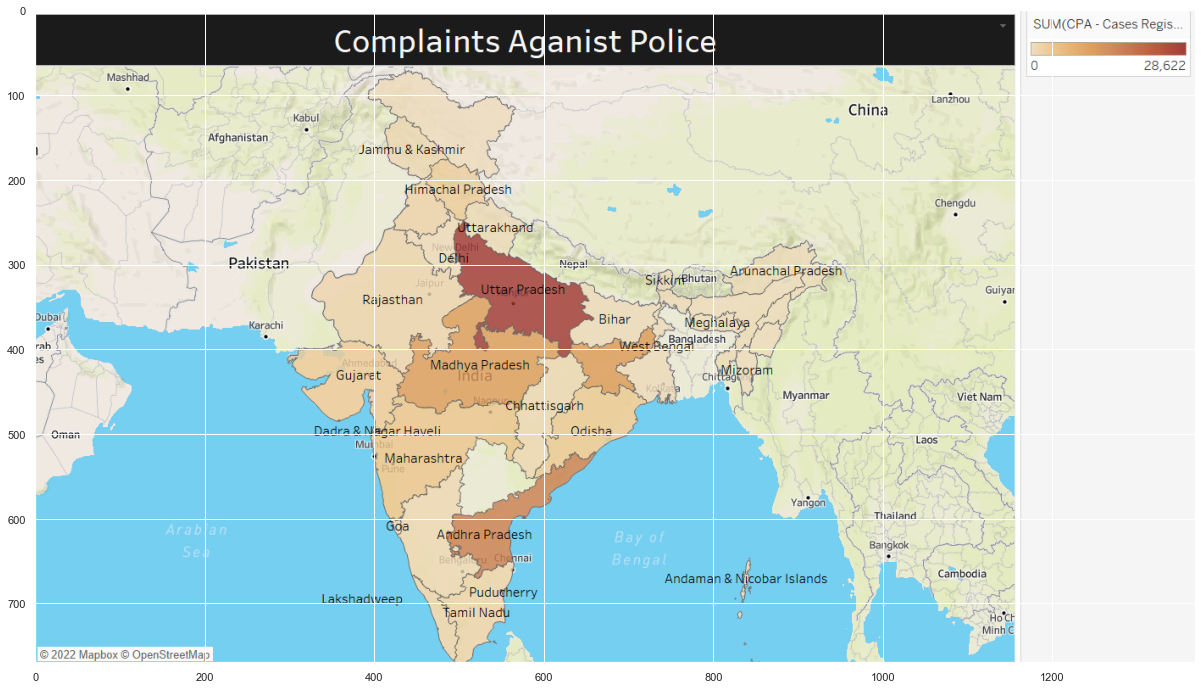

In [47]:
police_complain= image.open("Complaintsaganistpolice.png")
plt.figure(figsize=(24,12))
plt.imshow(police_complain)
plt.show()

# Section Observation
## The states with top complain aganist polices are :
###  * Uttarpradesh
###  * Andhra Pradesh
###  * Jharkhand
###  * Madhya Pradesh
###  * Maharashtra
#### Map Note : The darker the area the the more the complain aganist the police

## Q9.Which state is the safest for foreigners?

In [48]:
safest_foreginers=pd.read_sql_query("SELECT STATE_UT,sum(TOTALIPCCRIMES) as Total_Crime FROM District_wise_crimes_committed_IPC_2001_2012 GROUP by STATE_UT order by sum(TOTALIPCCRIMES) limit 5 ;",conn)

In [49]:
safest_foreginers


STATE_UT  Total_Crime
0    LAKSHADWEEP         1486
1    DAMAN & DIU         5896
2   D & N HAVELI         9302
3         SIKKIM        14000
4  A & N ISLANDS        18204

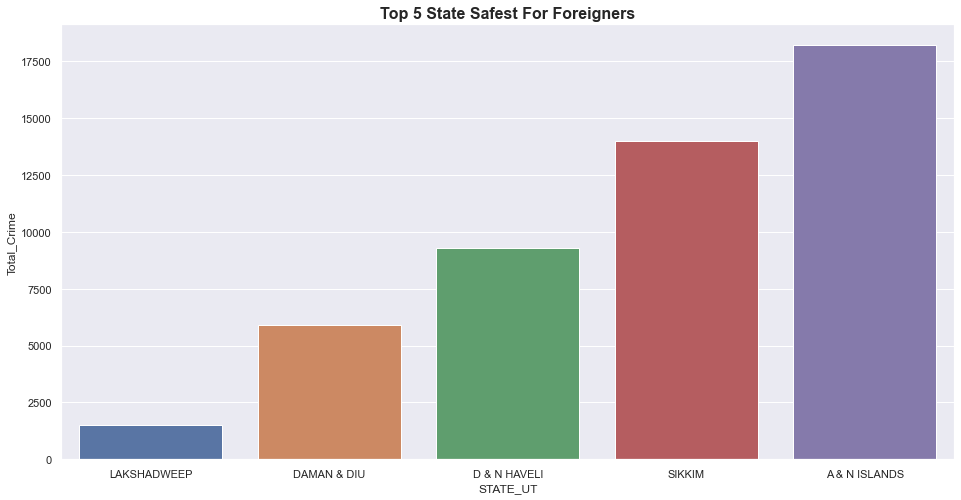

In [50]:
plt.figure(figsize=(16,8))
font={'weight':'bold','size': 16}
plt.title("Top 5 State Safest For Foreigners",fontdict=font)
sns.barplot(x=safest_foreginers["STATE_UT"],y=safest_foreginers["Total_Crime"])
plt.show()

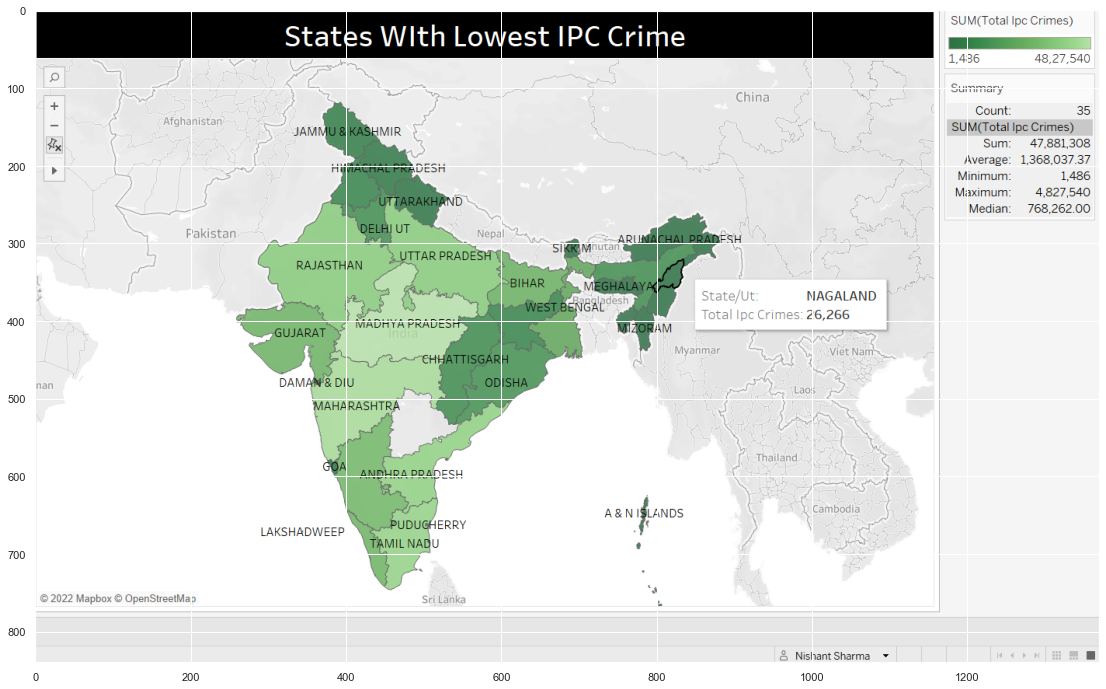

In [51]:
safest= image.open("leastcrimestate.png")
plt.figure(figsize=(24,12))
plt.imshow(safest)
plt.show()

# Section Observation
## Since the IPC crime data gives the data of all the crimes which are under the Indian judicary 
###  The safest state is decided by  the state having the lowest total of total IPC crime. 
###  The states are Lakshadeep,Daman & Diu,D & N Haveli,Sikkim And A  N Island.
###  Smaller the state by area the safer the state is.

####  Map Note : The Greener area is the lowest the crime is the safer the state is.

## Summary <br>
The Safest places for Foriegner are Listed above as well as Unsafest places safest places considered as there crimes against guests are lowest as compare to other states and Lakshaydweep is leading in the list <br>
where as second list showes that states_Ut unsafest for foriegners as there crime against guests are very high in numbers and Madhya Pradesh is Leading the the Unsafest places

# Group 6  :- 
<br>

### Mridul Chaturvedi
### Nainesh Bharambe
### Nishant Sharma
### Nitisha Kumawat

#### Dataset Link :-- https://www.kaggle.com/rajanand/crime-in-india
